In [3]:
#import pandas_oracle.tools as pt
import cx_Oracle
from matplotlib import pyplot as plt

In [ ]:
# !python -m pip install --upgrade  --user pip

In [1]:
import os
os.getcwd()

'C:\\Users\\Aaron\\OneDrive - HealthPlus Ltd\\PYTHON WORKS'

In [4]:
conn = cx_Oracle.connect('ReportUser/report@10.10.1.7:1521/rproods')
cur = conn.cursor()


In [6]:
sql ="select invoice.invc_sid, invoice.sbs_no, invoice.store_no, invoice.invc_type,invoice.status, invoice.use_vat,invoice.vat_options, invoice.disc_perc,invoice.disc_amt, invoice.created_date, invoice.modified_date, invoice.trans_disc_amt, invc_item.qty, invc_item.orig_price, invc_item.price, invc_item.tax_amt, invc_item.cost, invc_item.comm_amt, invc_item.tender_state, invc_lty.redeemed_amt, invc_lty.earned_points_positive, invc_lty.earned_points_negative, invc_lty.used_points_positive, invc_lty.used_points_negative,"
sql+= "store.store_name, invc_tender.tender_type,invc_tender.taken,invc_tender.given,invc_tender.amt,invc_tender.pmt_date"
sql+=" From invoice join invc_item on invoice.invc_sid=invc_item.invc_sid join invc_lty on invoice.invc_sid = invc_lty.invc_sid"

sql+="join invc_tender on invoice.invc_sid = invc_tender.invc_sid join store on invoice.sbs_no+invoice.orig_store_no = store.sbs_no+store.store_no"

In [7]:
cur.execute(sql)

DatabaseError: ORA-00933: SQL command not properly ended

In [ ]:
cur.execute(
    'select SBS_NO, STORE_CODE, STORE_NAME, ADDRESS1,ADDRESS5, PHONE1,ACTIVATION_DATE from store_v')

cols = ['SBS_NO', 'STORE_CODE', 'STORE_NAME',
        'ADDRESS1', 'ADDRESS5', 'PHONE1', 'ACTIVATION_DATE']


In [ ]:
s = cur.fetchall()
stores = pd.DataFrame(s, columns = cols)

In [ ]:
stores['mask'] = (stores['STORE_CODE']=='CMP') | (stores['STORE_CODE']=='SEL')

stores['mask'] = ~stores['mask']

In [ ]:
stores

In [ ]:
j = stores[stores['mask']]

In [ ]:
Q = (j['SBS_NO'])+(j['STORE_CODE']).astype(int)


In [ ]:
Q.head()

In [2]:
invn = cur.execute('Select INVC_SID, SBS_NO, STORE_NO, INVC_TYPE, HISEC_TYPE, STATUS, PROC_STATUS, CASHIER_ID, HELD, CUST_SID, WORKSTATION, ORIG_STATION, DISC_PERC,DISC_AMT, CREATED_DATE, MODIFIED_DATE, REF_INVC_SID, CREATEDBY_ID, ELAPSED_TIME,ACTIVITY_PERC,TRANS_DISC_AMT,STORE_NO_STATION, CREATED_MONTH, CREATED_WEEK, CREATED_HOUR, TENDER_TYPE from Invoice_V')

colname  = ["INVC_SID", "SBS_NO", "STORE_NO", "INVC_TYPE", "HISEC_TYPE", "STATUS", "PROC_STATUS", "CASHIER_ID", "HELD", "CUST_SID", "WORKSTATION", "ORIG_STATION", "DISC_PERC","DISC_AMT", "CREATED_DATE", "MODIFIED_DATE", "REF_INVC_SID", "CREATEDBY_ID", "ELAPSED_TIME","ACTIVITY_PERC","TRANS_DISC_AMT","STORE_NO_STATION", "CREATED_MONTH", "CREATED_WEEK", "CREATED_HOUR", "TENDER_TYPE"]

NameError: name 'cur' is not defined

In [ ]:
conn.version

In [ ]:

inv = invn.fetchall()
invoice = pd.DataFrame(inv,columns=colname)
    
cur.close()
conn.close()

In [ ]:
invoice.head()

In [ ]:
invoice['CUST_SID'].fillna(0, inplace=True)

In [ ]:
K = j['STORE_CODE'].astype(int)
j['STORE_CODE'] = j.merge

In [ ]:
k = j.groupby('SBS_NO')

In [ ]:
k

In [ ]:
k.head(200).sort_values('to_merge')


In [ ]:
invoice.merge(j, how='left', left_on = j['SBS_NO']+(j['STORE_CODE']).astype(int), right_on = invoice['SBS_NO']+invoice['STORE_NO'])

In [ ]:
stores['merge'
] = j['SBS_NO']+j['STORE_CODE']

invoice['merge'] = invoice['SBS_NO']+invoice['STORE_NO']

In [ ]:
stores['STORE_CODE']

In [ ]:
new = invoice.merge(stores['STORE_NAME'], how = "left", left_on=(invoice['SBS_NO']+invoice['STORE_NO']), right_on=(stores['SBS_NO']+stores['STORE_CODE']))

In [ ]:
stores[4:]

In [41]:
invc = "SELECT ITEM.INVC_SID, ITEM.QTY, ITEM.ORIG_PRICE,ITEM.PRICE, ITEM.COST, ITEM.USR_DISC_PERC,IV.SBS_NO, IV.STORE_NO, IV.INVC_TYPE,IV.DISC_AMT,IV.CREATED_DATE,IV.ELAPSED_TIME,IV.TRANS_DISC_AMT,IV.CREATED_WEEKDAY, IV.CREATED_HOUR FROM INVC_ITEM_V ITEM LEFT JOIN INVOICE_V IV ON ITEM.INVC_SID = IV.INVC_SID"

In [83]:
import datetime
x = datetime.datetime(8,31)
print(x)

TypeError: an integer is required (got type str)

In [281]:
invc = "SELECT ITEM.INVC_SID, ITEM.QTY, ITEM.ORIG_PRICE,ITEM.PRICE, ITEM.COST, ITEM.USR_DISC_PERC,IV.SBS_NO, IV.STORE_NO, IV.INVC_TYPE,IV.DISC_AMT,IV.CREATED_DATE,IV.ELAPSED_TIME,IV.TRANS_DISC_AMT,IV.CREATED_WEEKDAY, IV.CREATED_HOUR FROM INVC_ITEM_V ITEM INNER JOIN INVOICE_V IV ON ITEM.INVC_SID = IV.INVC_SID WHERE IV.SBS_NO=200 AND IV.STORE_NO = 18 AND INVC_TYPE = 0 AND CREATED_DATE BETWEEN TO_DATE('9/1/2019','MM/DD/YYYY') AND TO_DATE('9/30/2019','MM/DD/YYYY')"

In [332]:
July = "SELECT ITEM.INVC_SID, ITEM.QTY, ITEM.ORIG_PRICE,ITEM.PRICE, ITEM.COST, ITEM.USR_DISC_PERC,IV.SBS_NO, IV.STORE_NO, IV.INVC_TYPE,IV.DISC_AMT,IV.CREATED_DATE,IV.ELAPSED_TIME,IV.TRANS_DISC_AMT,IV.CREATED_WEEKDAY, IV.CREATED_HOUR FROM INVC_ITEM_V ITEM INNER JOIN INVOICE_V IV ON ITEM.INVC_SID = IV.INVC_SID WHERE IV.SBS_NO=200 AND IV.STORE_NO = 18 AND INVC_TYPE = 0 AND CREATED_DATE BETWEEN TO_DATE('7/1/2019','MM/DD/YYYY') AND TO_DATE('7/31/2019','MM/DD/YYYY')"

Aug = "SELECT ITEM.INVC_SID, ITEM.QTY, ITEM.ORIG_PRICE,ITEM.PRICE, ITEM.COST, ITEM.USR_DISC_PERC,IV.SBS_NO, IV.STORE_NO, IV.INVC_TYPE,IV.DISC_AMT,IV.CREATED_DATE,IV.ELAPSED_TIME,IV.TRANS_DISC_AMT,IV.CREATED_WEEKDAY, IV.CREATED_HOUR FROM INVC_ITEM_V ITEM INNER JOIN INVOICE_V IV ON ITEM.INVC_SID = IV.INVC_SID WHERE IV.SBS_NO=200 AND IV.STORE_NO = 18 AND INVC_TYPE = 0 AND CREATED_DATE BETWEEN TO_DATE('8/1/2019','MM/DD/YYYY') AND TO_DATE('8/31/2019','MM/DD/YYYY')"

In [333]:
Aug

"SELECT ITEM.INVC_SID, ITEM.QTY, ITEM.ORIG_PRICE,ITEM.PRICE, ITEM.COST, ITEM.USR_DISC_PERC,IV.SBS_NO, IV.STORE_NO, IV.INVC_TYPE,IV.DISC_AMT,IV.CREATED_DATE,IV.ELAPSED_TIME,IV.TRANS_DISC_AMT,IV.CREATED_WEEKDAY, IV.CREATED_HOUR FROM INVC_ITEM_V ITEM INNER JOIN INVOICE_V IV ON ITEM.INVC_SID = IV.INVC_SID WHERE IV.SBS_NO=200 AND IV.STORE_NO = 18 AND INVC_TYPE = 0 AND CREATED_DATE BETWEEN TO_DATE('8/1/2019','MM/DD/YYYY') AND TO_DATE('8/31/2019','MM/DD/YYYY')"

In [315]:
report = cur.execute(invc)

In [285]:
inv = report.fetchall()

In [334]:
Julrep = cur.execute(July)
jul = Julrep.fetchall()

In [337]:
len(jul)

1074

In [336]:
Augrep  =cur.execute(Aug)
aug = Augrep.fetchall()
len(aug)

1187

In [156]:
cols = "INVC_SID,QTY,ORIG_PRICE,PRICE,COST,USR_DISC_PERC,SBS_NO,STORE_NO,INVC_TYPE,DISC_AMT,CREATED_DATE,ELAPSED_TIME,TRANS_DISC_AMT,CREATED_WEEKDAY,CREATED_HOUR"

In [157]:
Columns = cols.split(',')

In [339]:
reports = pd.DataFrame(inv,columns = Columns)
reportsJu = pd.DataFrame(jul,columns = Columns)


In [340]:
reportsAu = pd.DataFrame(aug,columns = Columns)

In [341]:
reportsAu.head()

,INVC_SID,QTY,ORIG_PRICE,PRICE,COST,USR_DISC_PERC,SBS_NO,STORE_NO,INVC_TYPE,DISC_AMT,CREATED_DATE,ELAPSED_TIME,TRANS_DISC_AMT,CREATED_WEEKDAY,CREATED_HOUR
0,4064789909292805029,1.0,2400.0,2400.0,1600.0000,0.0,200,18,0,0.0,2019-08-01 10:28:27,251,NaN,4,10
1,4064789909292805029,1.0,6500.0,6500.0,4500.0000,0.0,200,18,0,0.0,2019-08-01 10:28:27,251,NaN,4,10
2,4064789909292805029,1.0,2500.0,2500.0,1666.6667,0.0,200,18,0,0.0,2019-08-01 10:28:27,251,NaN,4,10
3,4064789909292805029,1.0,1700.0,1700.0,750.0000,0.0,200,18,0,0.0,2019-08-01 10:28:27,251,NaN,4,10
4,4065213128144246360,1.0,1900.0,1900.0,1104.3521,0.0,200,18,0,NaN,2019-08-01 13:15:27,444,NaN,4,13


In [342]:
reportsJu.head()

,INVC_SID,QTY,ORIG_PRICE,PRICE,COST,USR_DISC_PERC,SBS_NO,STORE_NO,INVC_TYPE,DISC_AMT,CREATED_DATE,ELAPSED_TIME,TRANS_DISC_AMT,CREATED_WEEKDAY,CREATED_HOUR
0,3949733737402465116,1.0,10450.0,10450.0,7000.0000,0.0,200,18,0,0.0,2019-07-01 10:26:41,194,NaN,1,10
1,3949762238571225861,1.0,1150.0,1150.0,821.9400,0.0,200,18,0,0.0,2019-07-01 11:00:23,90,NaN,1,11
2,3950127859217819665,1.0,650.0,650.0,333.3333,0.0,200,18,0,NaN,2019-07-01 12:50:20,79,NaN,1,12
3,3950127859217819665,1.0,650.0,650.0,333.3333,0.0,200,18,0,NaN,2019-07-01 12:50:20,79,NaN,1,12
4,3950451191216959430,1.0,2700.0,2700.0,1350.0000,0.0,200,18,0,0.0,2019-07-01 14:55:13,39,NaN,1,14


In [343]:
reports['DISC_AMT'] = reports['DISC_AMT'].fillna(0)
reports['TRANS_DISC_AMT'] = reports['TRANS_DISC_AMT'].fillna(0)
reports['SALES'] = reports['QTY']+reports['PRICE']
reportsJu['SALES'] = reportsJu['QTY']+reportsJu['PRICE']
reportsAu['SALES'] = reportsAu['QTY']+reportsAu['PRICE']

In [344]:
dt = reports.groupby(reports['CREATED_WEEKDAY'])
dju = reportsJu.groupby(reportsJu['CREATED_WEEKDAY'])
dau = reportsAu.groupby(reportsAu['CREATED_WEEKDAY'])
Dys = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']


In [345]:
dau.SALES.describe()

,count,mean,std,min,25%,50%,75%,max
CREATED_WEEKDAY,,,,,,,,
0,171.0,3095.289942,2629.635049,251.00,1201.00,2501.0,4101.0,20420.26
1,187.0,4523.079251,7073.795081,251.00,1376.00,2801.0,6201.0,81165.82
2,120.0,3955.625000,3390.128358,241.00,1094.75,2701.0,6251.0,15001.00
3,74.0,3538.297297,2835.934915,251.00,1163.50,2726.0,5613.5,11301.00
4,167.0,3384.651437,3546.054384,304.81,1201.00,2501.0,3791.0,32101.00
5,236.0,4231.538220,4429.513609,251.00,1401.00,3076.0,5951.0,41851.00
6,232.0,3665.586207,3295.467212,251.00,1301.00,2746.0,5201.0,26501.00


In [346]:
dju.SALES.describe()

,count,mean,std,min,25%,50%,75%,max
CREATED_WEEKDAY,,,,,,,,
0,179.0,3795.234804,3406.268824,501.0,1551.0,2501.0,4951.0,18951.0
1,189.0,3115.211693,2855.951600,251.0,1201.0,2381.0,4201.0,27001.0
2,108.0,5375.406852,7093.002418,251.0,1801.0,3451.0,6038.5,41851.0
3,108.0,3916.310370,4629.865003,251.0,1201.0,2501.0,5288.5,26501.0
4,124.0,3871.955645,3497.174168,251.0,1201.0,2751.0,5851.0,20501.0
5,154.0,3683.496753,3259.674844,411.0,1426.0,2701.0,4983.5,24001.0
6,212.0,4005.534292,4349.944323,251.0,1288.5,3196.0,5213.5,41851.0


In [347]:
Xsum = dt.SALES.sum()
Xmean = dt.SALES.mean()
Xcount = dt.SALES.count()
MeanJ = dju.SALES.mean()
SumJ= dju.SALES.sum()
CountJ = dju.SALES.count()
MeanA = dau.SALES.mean()
SumA = dau.SALES.sum()
CountA = dau.SALES.count()


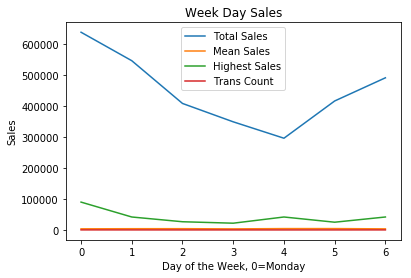

In [223]:
plt.plot(Xsum, label = "Total Sales")
plt.plot(Xmean, label = "Mean Sales")
plt.plot(Xmax, label = "Highest Sales")
plt.plot(Xcount, label = "Trans Count")
plt.title("Week Day Sales")
plt.xlabel("Day of the Week, 0=Monday")
plt.ylabel("Sales")
plt.legend(loc="upper center")
plt.show()

In [181]:
Total_Sales = Xsum.join(Xmean,how='left' on  


In [227]:
list(Xcount)

[176, 137, 100, 101, 68, 95, 140]

In [348]:
Sept = pd.DataFrame([list(Xsum),list(Xmean),list(Xcount)]).T
Sept.columns = ['Total Sales','Average Sales','Tranx Count']

Aug = pd.DataFrame([list(SumA),list(MeanA),list(CountA)]).T
Aug.columns = ['Total Sales','Average Sales','Tranx Count']

July = pd.DataFrame([list(SumJ),list(MeanJ),list(CountJ)]).T
July.columns = ['Total Sales','Average Sales','Tranx Count']

In [350]:
July

,Total Sales,Average Sales,Tranx Count
0,679347.03,3795.234804,179.0
1,588775.01,3115.211693,189.0
2,580543.94,5375.406852,108.0
3,422961.52,3916.310370,108.0
4,480122.50,3871.955645,124.0
5,567258.50,3683.496753,154.0
6,849173.27,4005.534292,212.0


In [367]:
Aug

,index,Total Sales,Average Sales,Tranx Count
0,0,529294.58,3095.289942,171.0
1,1,845815.82,4523.079251,187.0
2,2,474675.00,3955.625000,120.0
3,3,261834.00,3538.297297,74.0
4,4,565236.79,3384.651437,167.0
5,5,998643.02,4231.538220,236.0
6,6,850416.00,3665.586207,232.0


In [352]:
Sept

,Total Sales,Average Sales,Tranx Count
0,620355.20,3544.886857,175.0
1,510149.98,3894.274656,131.0
2,400239.00,4042.818182,99.0
3,329704.00,3434.416667,96.0
4,222236.94,3527.570476,63.0
5,399056.16,4245.278298,94.0
6,450135.92,3238.387914,139.0


<function matplotlib.pyplot.show(*args, **kw)>

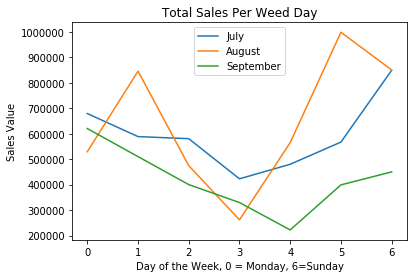

In [408]:
plt.plot(July['Total Sales'], label = "July")
plt.plot(Aug['Total Sales'], label = 'August')
plt.plot(Sept['Total Sales'], label = 'September')
plt.legend(loc='upper center')
plt.title('Total Sales Per Weed Day')
plt.xlabel('Day of the Week, 0 = Monday, 6=Sunday')
plt.ylabel('Sales Value')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

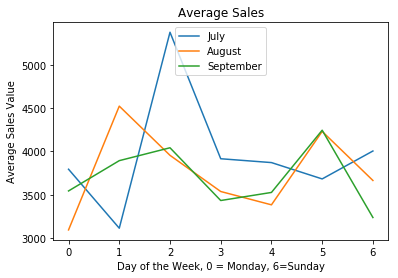

In [403]:
plt.plot(July['Average Sales'], label = "July")
plt.plot(Aug['Average Sales'], label = 'August')
plt.plot(Sept['Average Sales'], label = 'September')
plt.legend(loc='upper center')
plt.title('Average Sales')
plt.xlabel('Day of the Week, 0 = Monday, 6=Sunday')
plt.ylabel('Average Sales Value')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

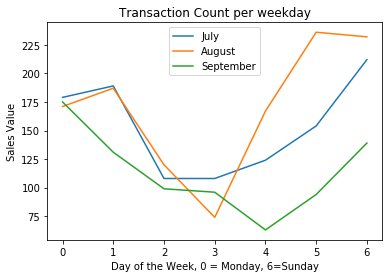

In [405]:
plt.plot(July['Tranx Count'], label = "July")
plt.plot(Aug['Tranx Count'], label = 'August')
plt.plot(Sept['Tranx Count'], label = 'September')
plt.legend(loc='upper center')
plt.title('Transaction Count per weekday')
plt.xlabel('Day of the Week, 0 = Monday, 6=Sunday')
plt.ylabel('Sales Value')
plt.show

In [388]:
data = pd.concat([July,Aug,Sept], axis=1, )

In [392]:
data.drop(columns='Month')

,index,Total Sales,Average Sales,Tranx Count,index,Total Sales,Average Sales,Tranx Count,level_0,index,Total Sales,Average Sales,Tranx Count
0,0,679347.03,3795.234804,179.0,0,529294.58,3095.289942,171.0,0,0,620355.20,3544.886857,175.0
1,1,588775.01,3115.211693,189.0,1,845815.82,4523.079251,187.0,1,1,510149.98,3894.274656,131.0
2,2,580543.94,5375.406852,108.0,2,474675.00,3955.625000,120.0,2,2,400239.00,4042.818182,99.0
3,3,422961.52,3916.310370,108.0,3,261834.00,3538.297297,74.0,3,3,329704.00,3434.416667,96.0
4,4,480122.50,3871.955645,124.0,4,565236.79,3384.651437,167.0,4,4,222236.94,3527.570476,63.0
5,5,567258.50,3683.496753,154.0,5,998643.02,4231.538220,236.0,5,5,399056.16,4245.278298,94.0
6,6,849173.27,4005.534292,212.0,6,850416.00,3665.586207,232.0,6,6,450135.92,3238.387914,139.0


In [393]:
data.to_csv('sales.csv')